In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

ln: failed to create symbolic link '/content/data': File exists
Updating fastai...
Done.


In [2]:
!mkdir data/wild

mkdir: cannot create directory ‘data/wild’: No such file or directory


In [3]:
!cp *txt data/wild

cp: cannot stat '*txt': No such file or directory


In [0]:
from fastai.vision import *
from fastai import *

In [0]:
folder = 'lions'
file = 'lions.txt'

In [0]:
folder = 'tiger'
file = 'tiger.txt'

In [0]:
folder = 'cheetha'
file = 'cheetha.txt'

In [0]:
path = Path('data/wild')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [11]:
download_images(path/file, dest, max_pics=200)

Error https://wildlifewarriors.org.au/new_site/images/content-images/Wildlife%20Warriors%20for%20Cheetah%20Conservation%20in%20South%20Africa.jpg HTTPSConnectionPool(host='wildlifewarriors.org.au', port=443): Max retries exceeded with url: /new_site/images/content-images/Wildlife%20Warriors%20for%20Cheetah%20Conservation%20in%20South%20Africa.jpg (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:847)'),))


In [0]:
classes = ['lions', 'tiger', 'cheetha']

## create ImageDataBunch

In [13]:
for i in classes:
    print(i)
    verify_images(path/i, delete=True, nax_workers=8)

lions


cannot identify image file <_io.BufferedReader name='data/wild/lions/00000136.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='data/wild/lions/00000159.jpg'>
cannot identify image file <_io.BufferedReader name='data/wild/lions/00000171.jpg'>
cannot identify image file <_io.BufferedReader name='data/wild/lions/00000106.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='data/wild/lions/00000056.jpeg'>
cannot identify image file <_io.BufferedReader name='data/wild/lions/00000143.jpg'>
cannot identify image file <_io.BufferedReader name='data/wild/lions/00000079.jpg'>
cannot identify image file <_io.BufferedReader name='data/wild/lions/00000132.jpg'>
cannot identify image file <_io.BufferedReader name='data/wild/lions/00000093.jpg'>
cannot identify image file <_io.BufferedReader name='data/wild/lions/00000033.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


tiger


cannot identify image file <_io.BufferedReader name='data/wild/tiger/00000199.jpg'>
cannot identify image file <_io.BufferedReader name='data/wild/tiger/00000182.jpg'>
cannot identify image file <_io.BufferedReader name='data/wild/tiger/00000107.jpg'>
cannot identify image file <_io.BufferedReader name='data/wild/tiger/00000086.jpg'>
cannot identify image file <_io.BufferedReader name='data/wild/tiger/00000034.jpg'>
cannot identify image file <_io.BufferedReader name='data/wild/tiger/00000172.jpg'>
cannot identify image file <_io.BufferedReader name='data/wild/tiger/00000149.jpg'>
cannot identify image file <_io.BufferedReader name='data/wild/tiger/00000156.jpg'>
cannot identify image file <_io.BufferedReader name='data/wild/tiger/00000032.jpg'>
cannot identify image file <_io.BufferedReader name='data/wild/tiger/00000121.jpg'>
cheetha


cannot identify image file <_io.BufferedReader name='data/wild/cheetha/00000136.jpg'>
cannot identify image file <_io.BufferedReader name='data/wild/cheetha/00000171.jpg'>
cannot identify image file <_io.BufferedReader name='data/wild/cheetha/00000086.jpg'>
cannot identify image file <_io.BufferedReader name='data/wild/cheetha/00000106.jpg'>
cannot identify image file <_io.BufferedReader name='data/wild/cheetha/00000009.jpg'>
cannot identify image file <_io.BufferedReader name='data/wild/cheetha/00000142.jpg'>
cannot identify image file <_io.BufferedReader name='data/wild/cheetha/00000140.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='data/wild/cheetha/00000084.jpg'>
cannot identify image file <_io.BufferedReader name='data/wild/cheetha/00000024.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2, ds_tfms=get_transforms(),
                                 size=224, num_workers=4).normalize(imagenet_stats)

In [15]:
data.classes, data.c

(['cheetha', 'lions', 'tiger'], 3)

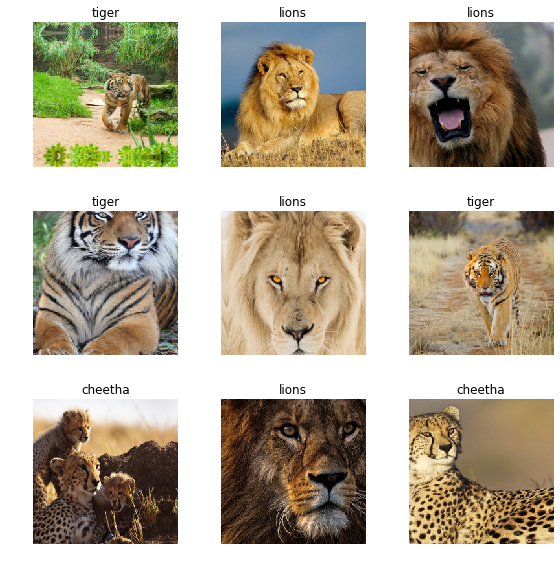

In [16]:
data.show_batch(rows=3, figsize=(8, 8))

## Training a model

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [24]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.043014,0.134800,0.018182,00:31
1,0.547924,0.026506,0.000000,00:33
2,0.359952,0.025762,0.009091,00:33
3,0.262683,0.030764,0.009091,00:32


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [27]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


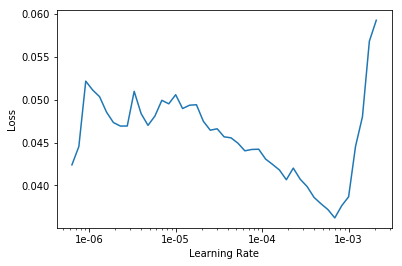

In [28]:
learn.recorder.plot()

In [29]:
learn.fit_one_cycle(2, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.090017,0.022063,0.000000,00:32
1,0.059104,0.017126,0.000000,00:34


In [0]:
learn.save('stage-2')

## Interpretation

In [31]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (441 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cheetha,cheetha,cheetha,cheetha,cheetha
Path: data/wild;

Valid: LabelList (110 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
tiger,cheetha,cheetha,cheetha,lions
Path: data/wild;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tra

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

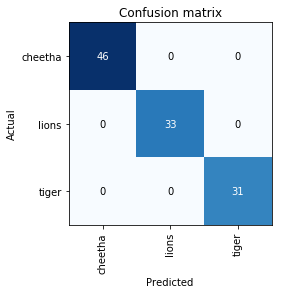

In [33]:
interp.plot_confusion_matrix()

In [34]:
db = (ImageList.from_folder(path)
                    .no_split()
                    .label_from_folder()
                    .transform(get_transforms(), size=224)
                    .databunch()
     )

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:171: UserWarning: `no_split` is deprecated, please use `split_none`.
  warn("`no_split` is deprecated, please use `split_none`.")


In [35]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (551 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cheetha,cheetha,cheetha,cheetha,cheetha
Path: data/wild;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: data/wild;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), 

In [0]:
ds, idx = DatasetFormatter().from_top_losses(learn_cln)

## Putting model in production

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

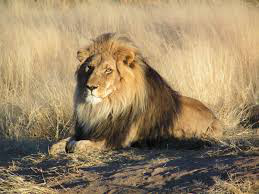

In [38]:
img = open_image('lion.jpg')
img

In [0]:
learn = load_learner(path)

In [40]:
pred_class, pred_idx, outputs = learn.predict(img)
pred_class

Category lions